In [32]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
files = glob.glob('data-to-use/*.csv')

In [89]:
df_feb = df_march = df_jan = df_2019 = df_jan_march = pd.DataFrame(columns=pd.read_csv(files[0]).columns)
for f in files:
    df = pd.read_csv(f)
    df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
    df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
    df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
    df_2019 = df_jan_march.append(df[(df.years == 2019)], ignore_index=True)
    df_jan_march = df_feb.append(df[(df.years == 2020) & (df.months < 4)], ignore_index=True)

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
0,1747,1747,4.961892,Watched,['Science & Technology'],87.0,9045.0,1812.0,265353.0,2020,1,1,15,49,2,https://www.youtube.com/watch?v=2CmOsrdXl0E,Can You Cook a Chicken by Slapping It? | Becau...,youtube,NaN,2020-01-01 15:49:00
1,1748,1748,NaN,Searched,NaN,NaN,NaN,NaN,NaN,2020,1,1,15,49,2,https://www.youtube.com/results?search_query=S...,NaN,youtube,NaN,2020-01-01 15:49:00
2,1746,1746,5.000000,Watched,['Gaming'],0.0,117.0,52.0,2055.0,2020,1,1,15,50,2,https://www.youtube.com/watch?v=TgOLGMhFMX4,"If kinetic energy turns into thermal energy, h...",youtube,NaN,2020-01-01 15:50:00
3,7930,3279,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,1,16,36,2,NaN,NaN,search,stack cup,2020-01-01 16:36:00
4,7927,3276,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,1,1,17,27,2,NaN,NaN,search,Arizer Solo 2 - Portable Herbal Vaporizers For...,2020-01-01 17:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54855,6031,1432,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,1,31,23,32,4,NaN,NaN,search,19 Powerful Keywords (Besides “Manage”) to Put...,2020-01-31 23:32:00
54856,6030,1431,NaN,Searched,"[['/Arts & Entertainment', 0.5899999737739563]]",NaN,NaN,NaN,NaN,2020,1,31,23,51,4,NaN,NaN,search,kevin berger,2020-01-31 23:51:00
54857,6029,1430,NaN,Searched,[],NaN,NaN,NaN,NaN,2020,1,31,23,51,4,NaN,NaN,search,kevin berger blue ridge,2020-01-31 23:51:00
54858,6028,1429,NaN,Visited,[],NaN,NaN,NaN,NaN,2020,1,31,23,51,4,NaN,NaN,search,https://www.blueridgepartners.com/team/kevin-b...,2020-01-31 23:51:00


Text(0.5, 1.0, 'Popularity of Common Search Terms from Google Trends in March 2020')

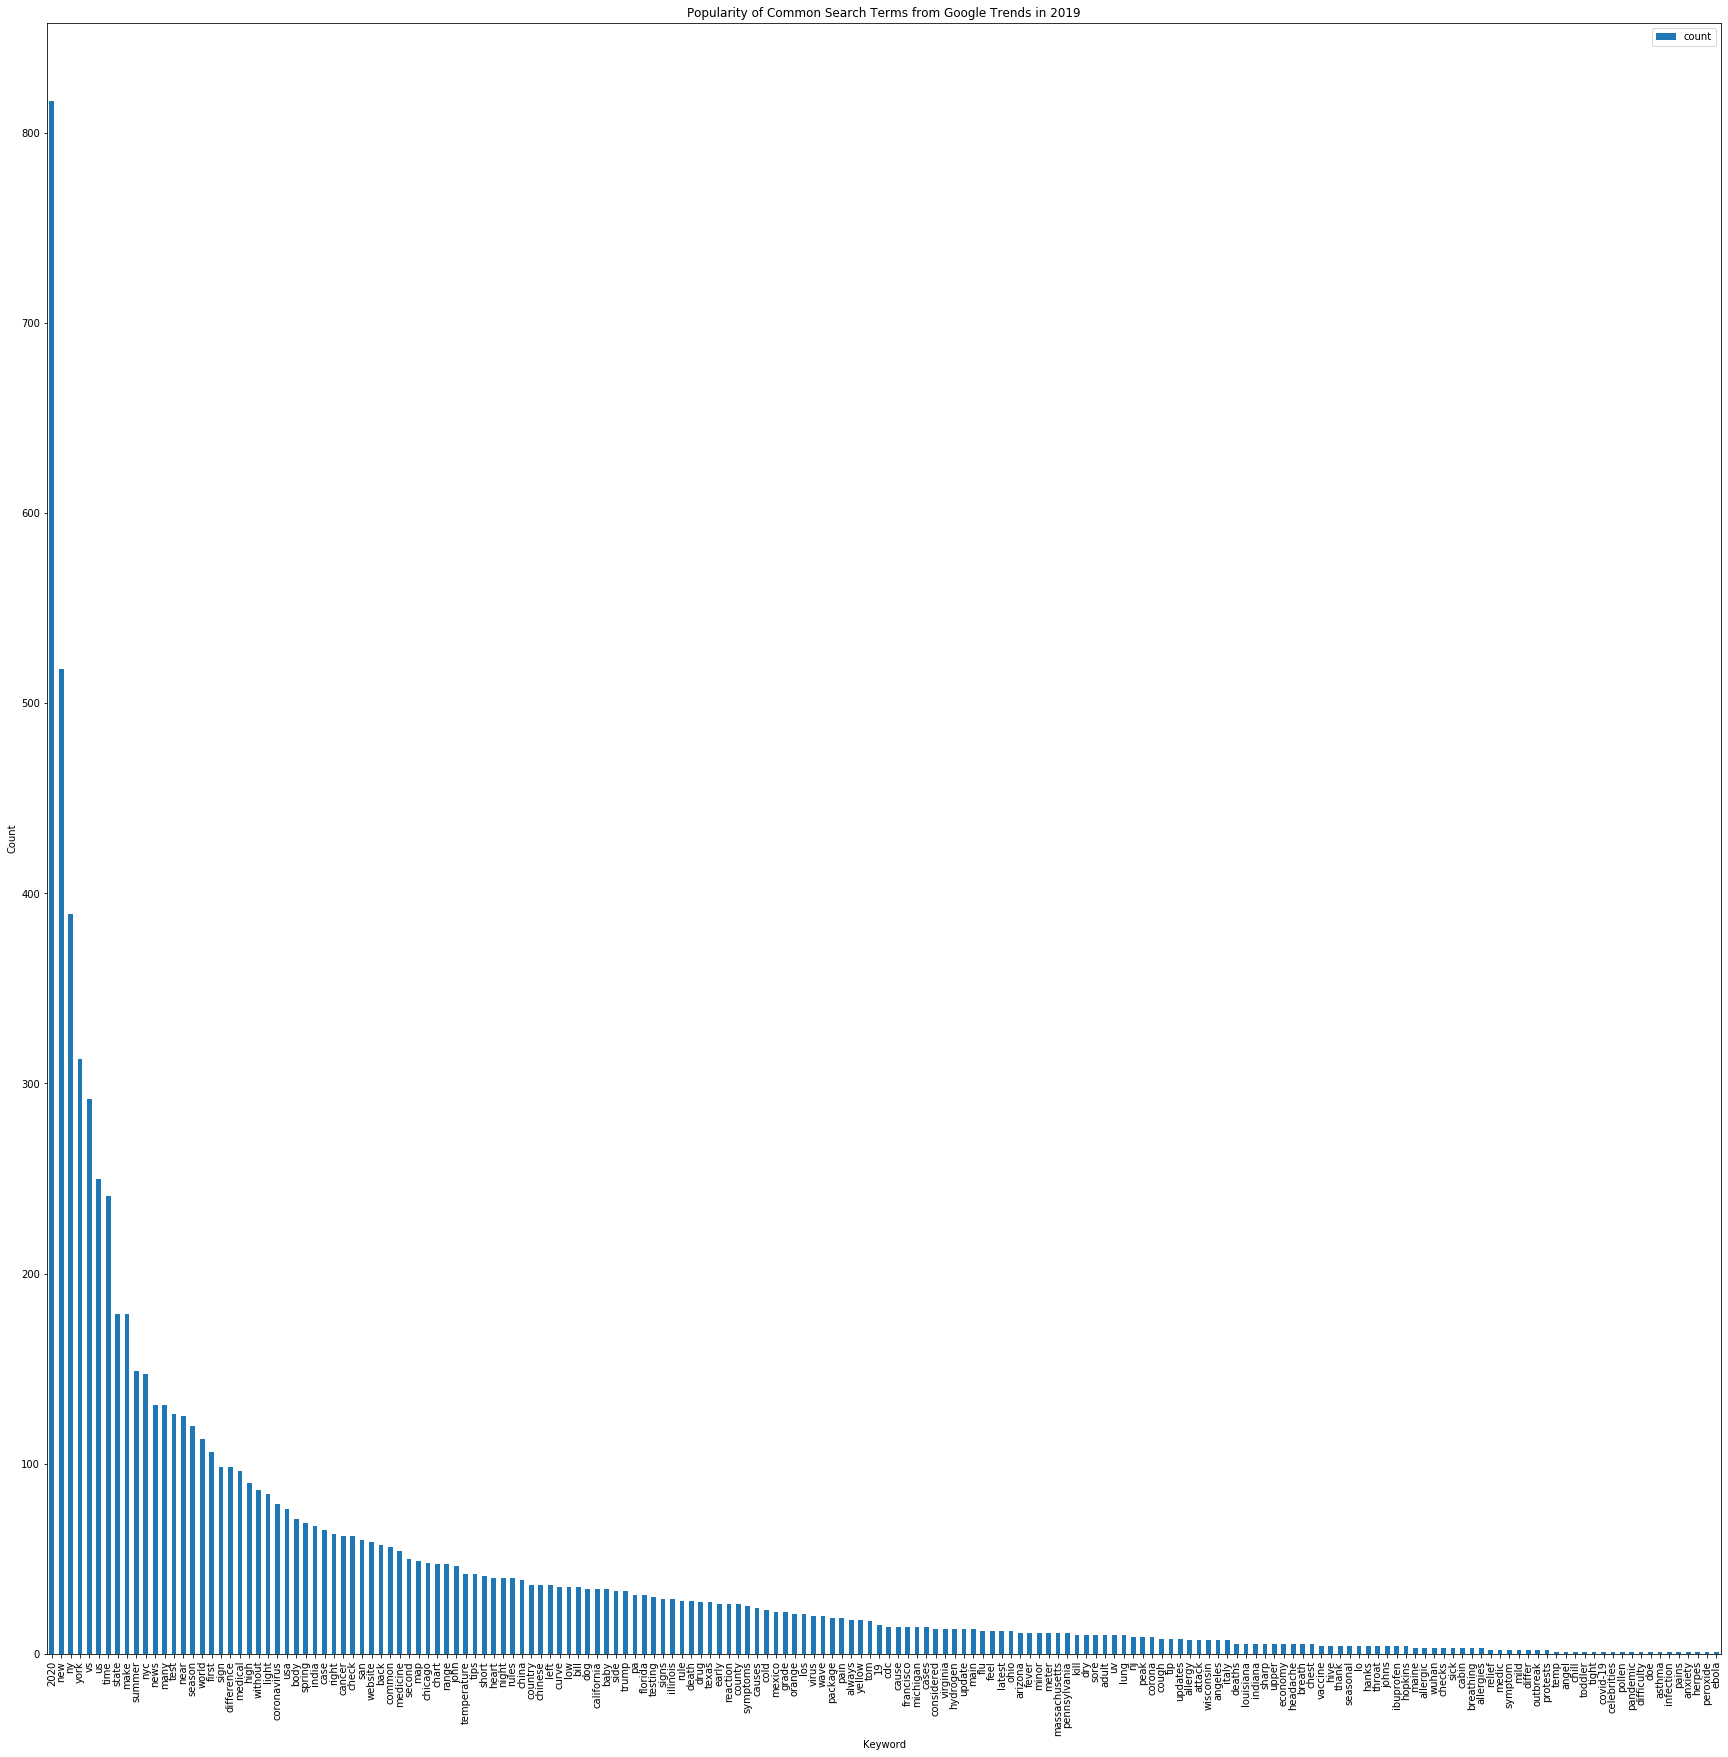

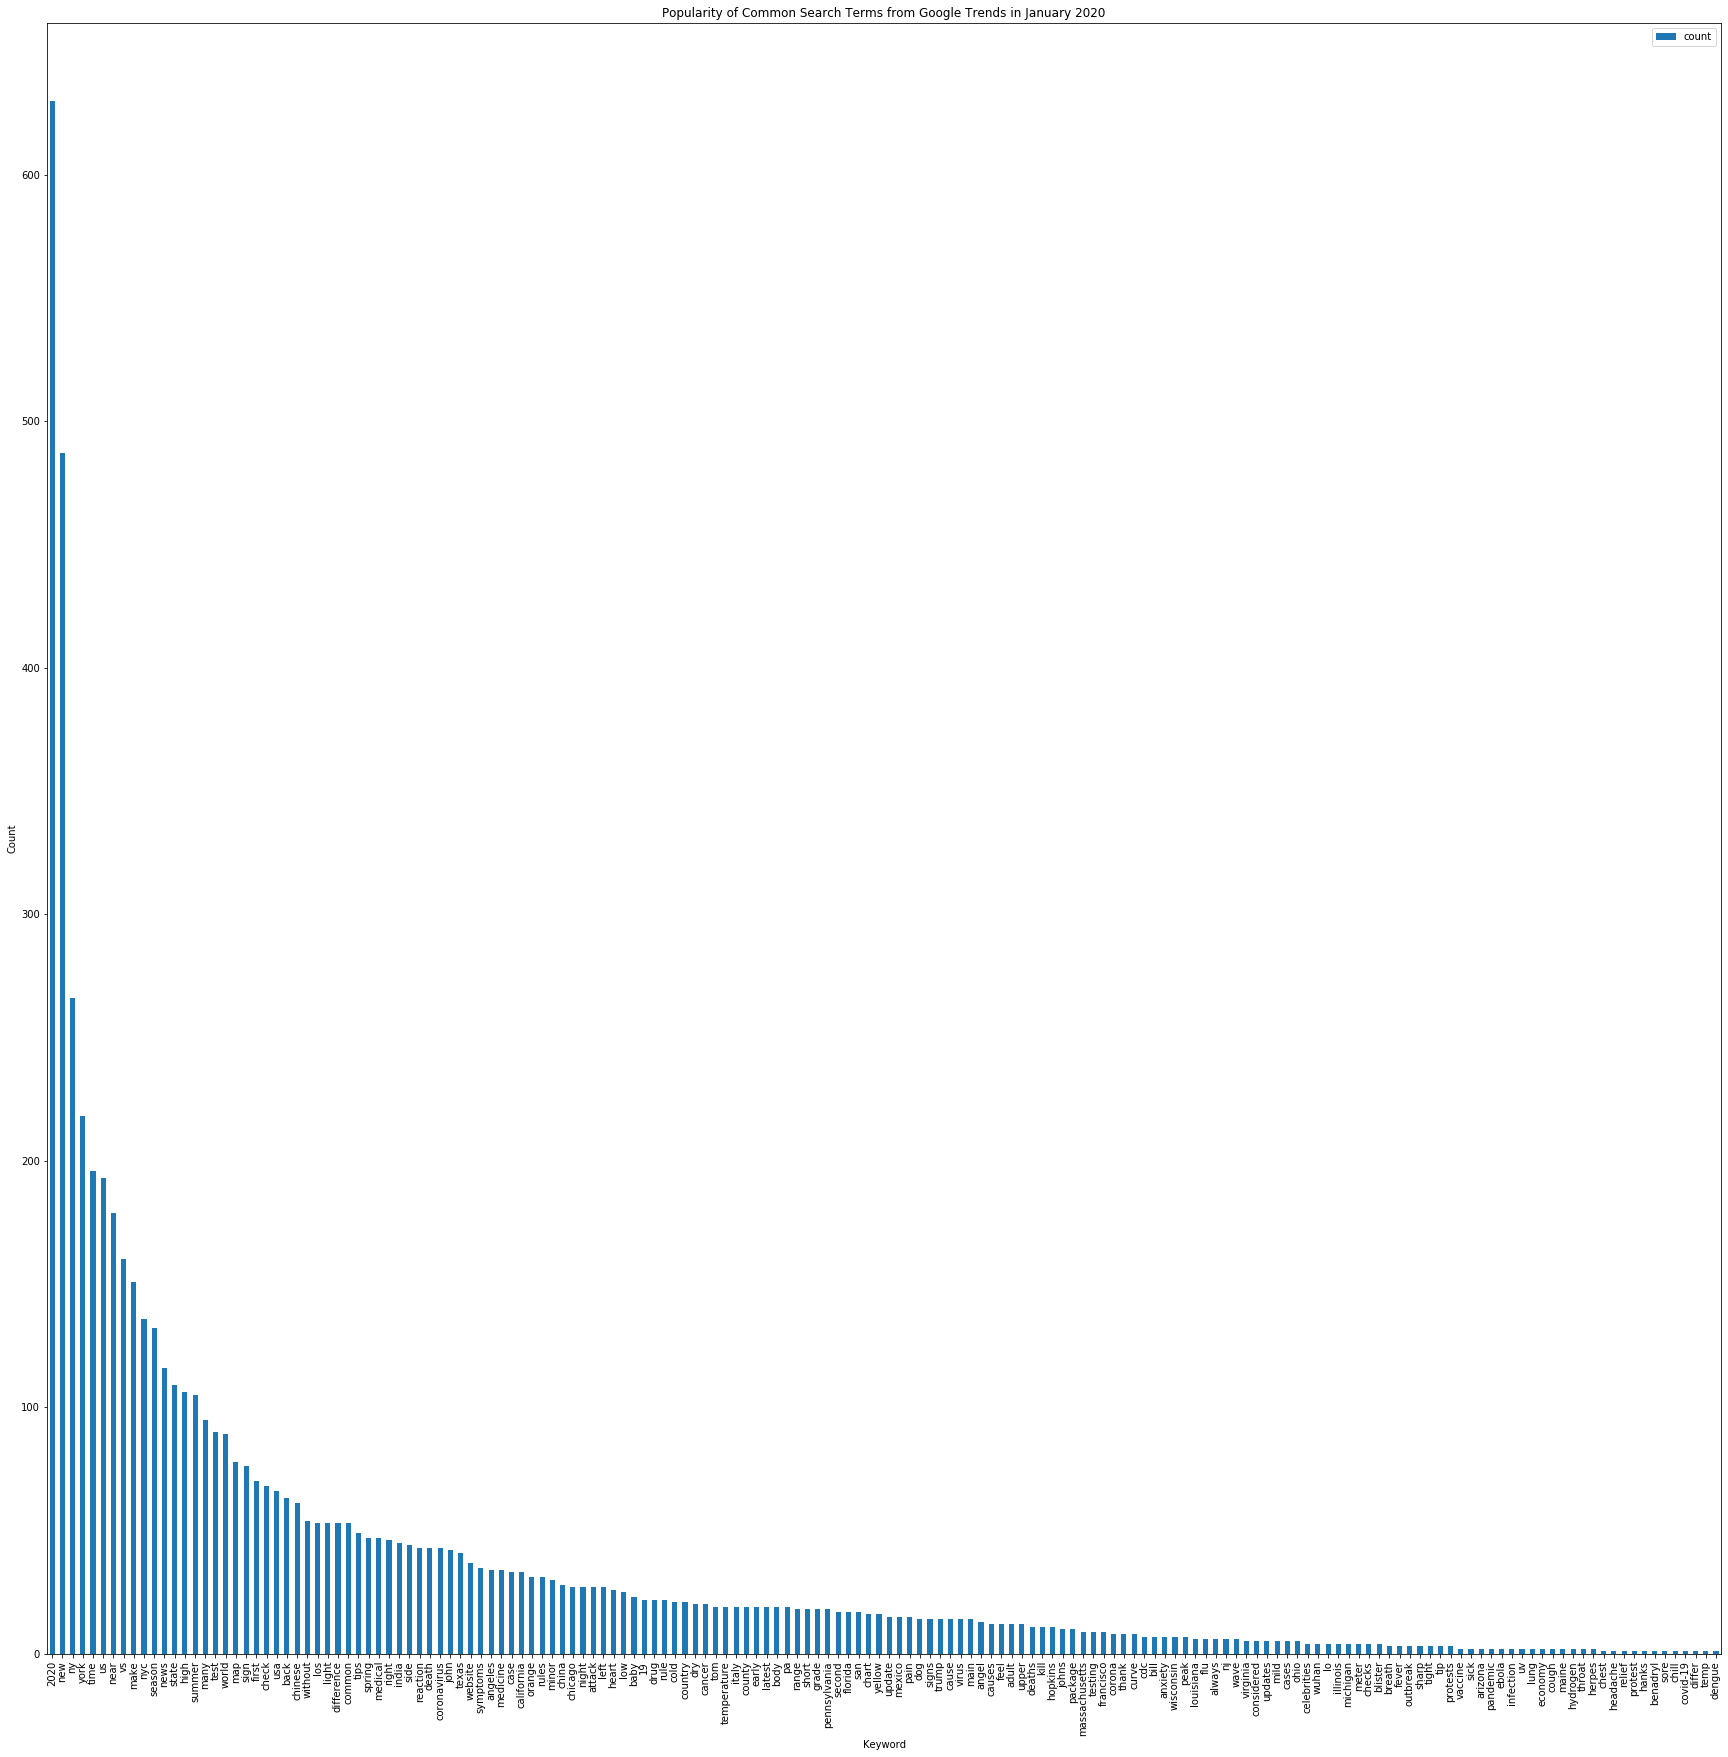

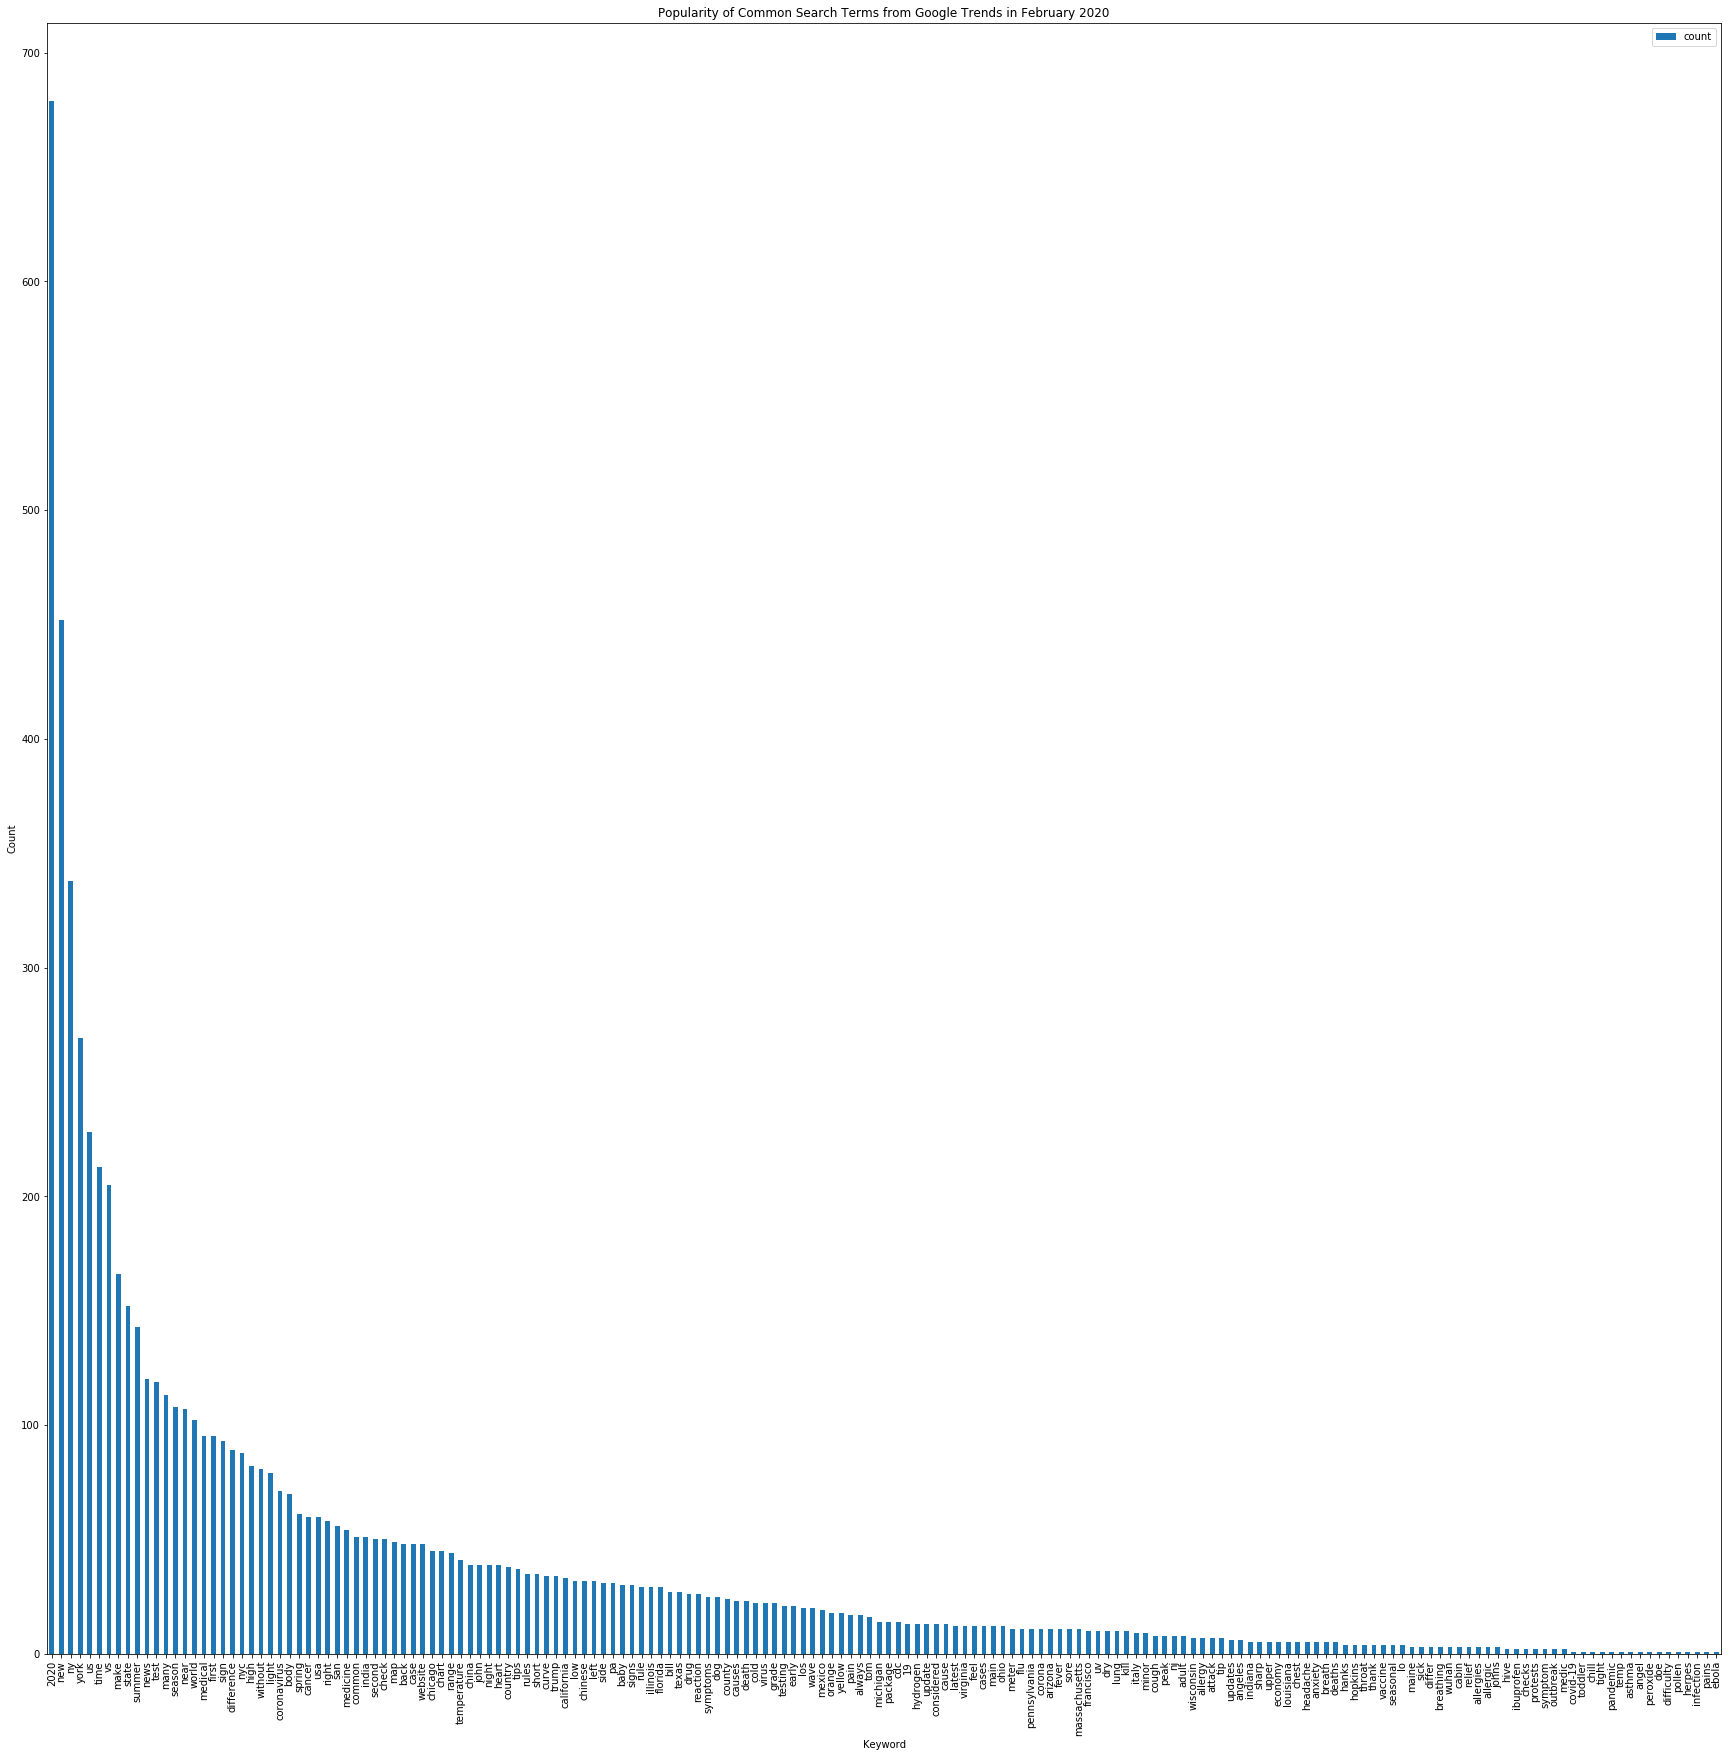

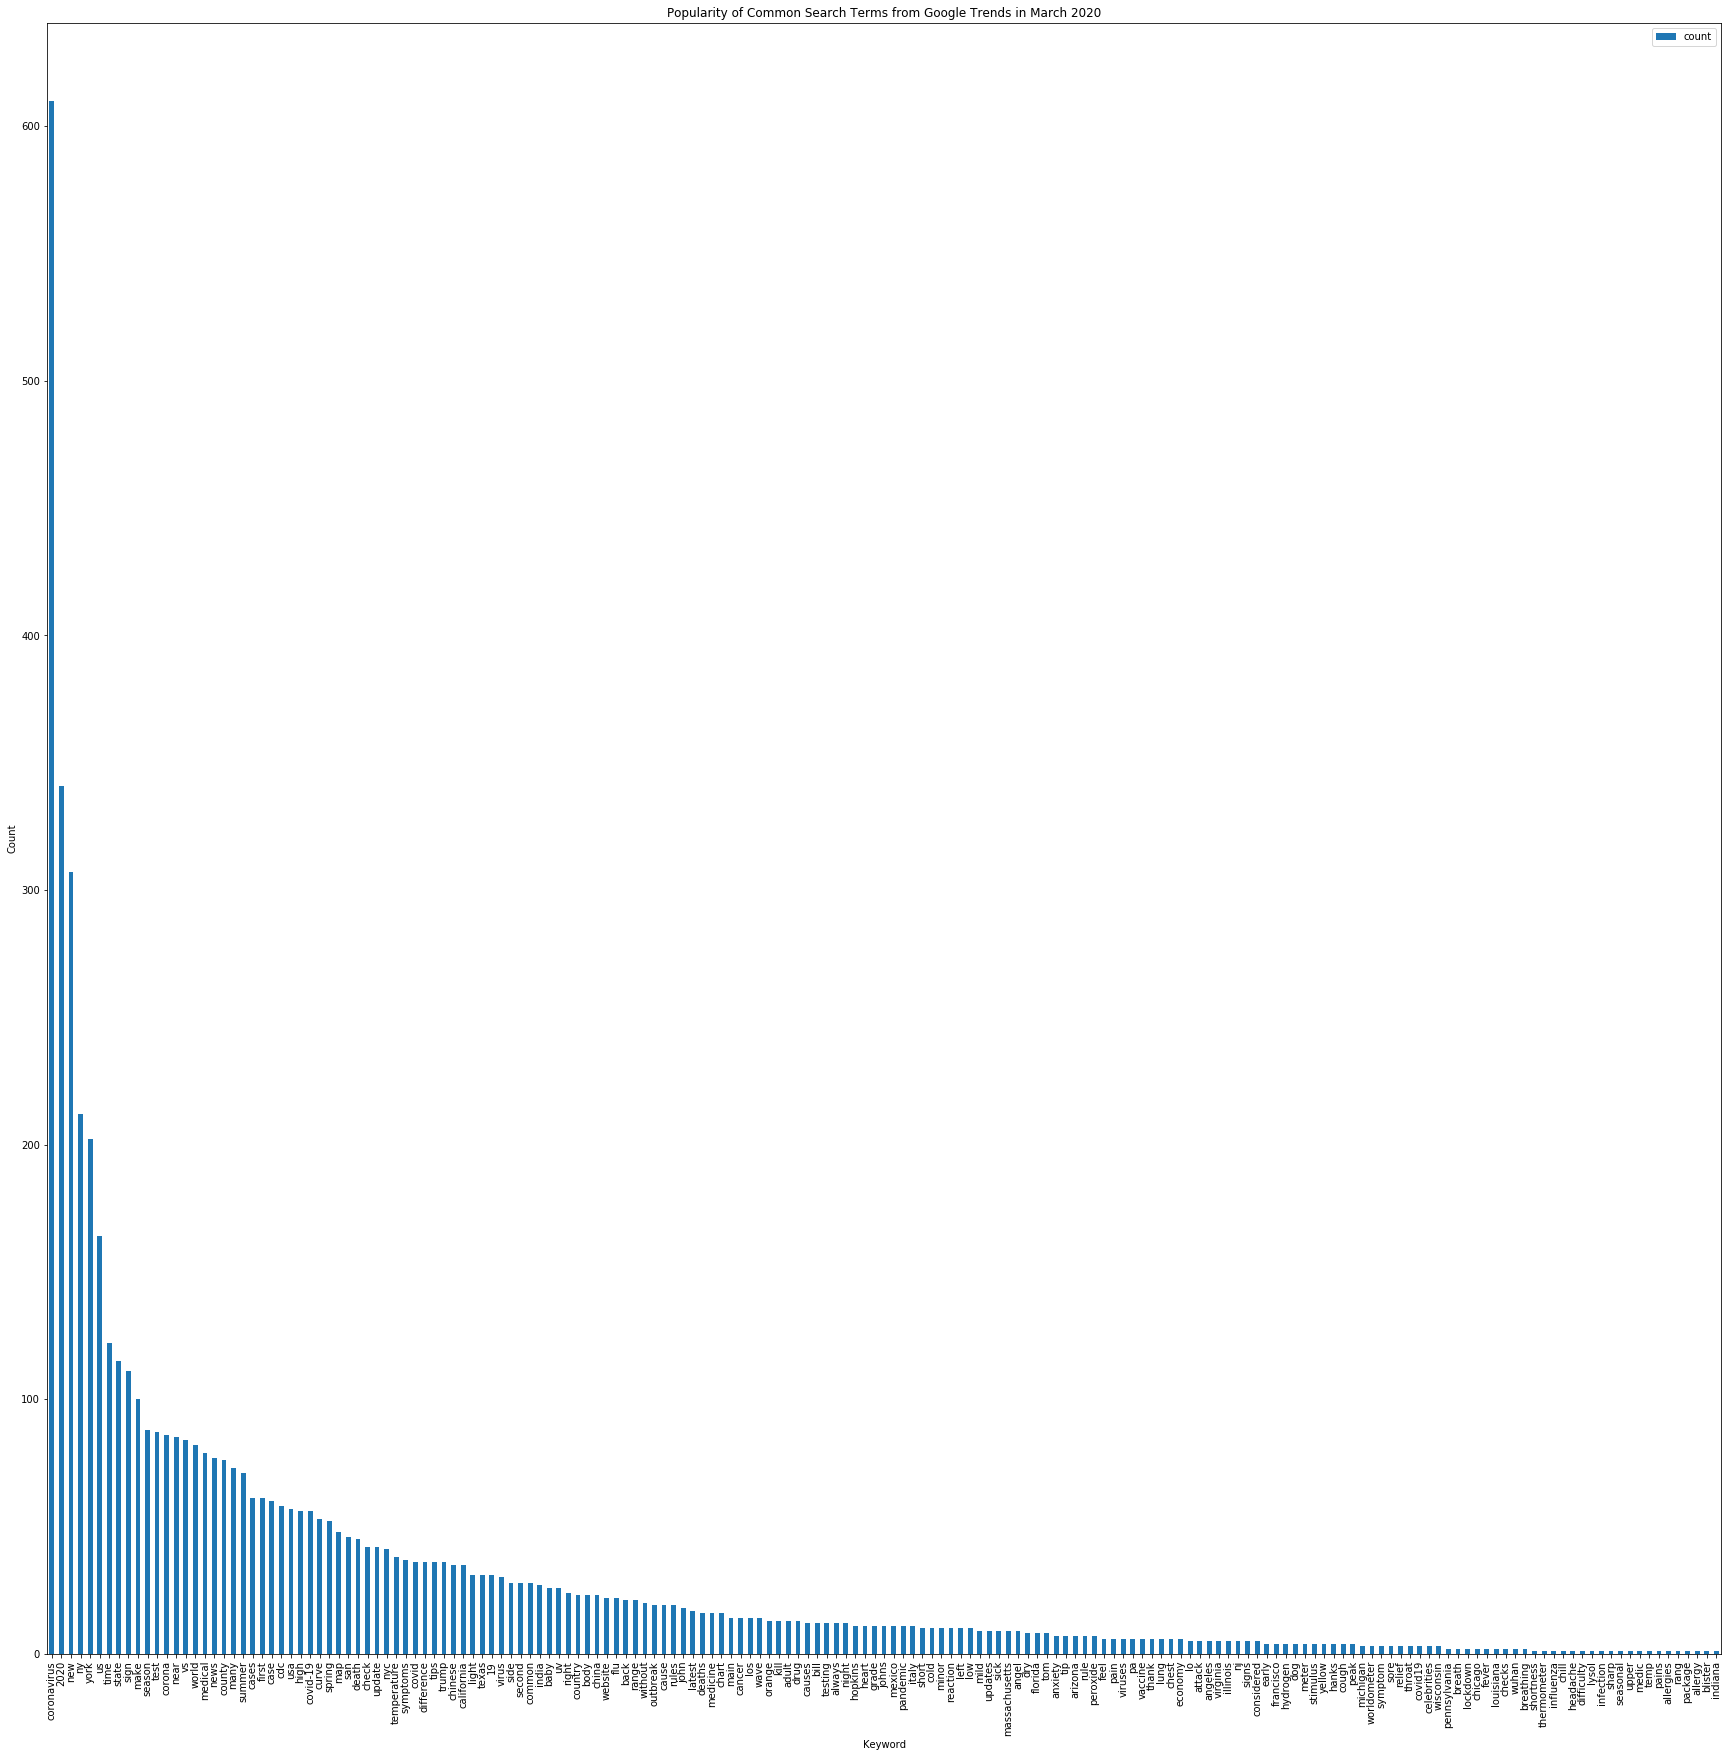

In [64]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer 

ps = PorterStemmer()

df_2019.dropna(subset=['query'])
df_jan.dropna(subset=['query'])
df_feb.dropna(subset=['query'])
df_march.dropna(subset=['query'])
df_jan_march.dropna(subset=['query'])

file_list = open("words_list.txt", "r")
list_of_phrases = []
for line in file_list:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    list_of_phrases.append(line_list)

list_of_phrases = [[x.casefold() for x in sublst] for sublst in list_of_phrases]
        

lowercase_list_of_words = []
for p in list_of_phrases:
    for w in p:
        lowercase_list_of_words.append(w.lower())

lowercase_list_of_words = list(dict.fromkeys(lowercase_list_of_words))


keyword_stemmed_list = []
for p in list_of_phrases:
    for w in p:
        keyword_stemmed_list.append(ps.stem(w.lower()))
        
keyword_stemmed_list = list(dict.fromkeys(keyword_stemmed_list))

full_key_list = lowercase_list_of_words + keyword_stemmed_list 
full_key_list = list(dict.fromkeys(full_key_list))


redundant_words = set(stopwords.words('english'))

filtered_key_list = []
for w in full_key_list:
    if w not in redundant_words:
        filtered_key_list.append(w)

# filtered_key_list = filtered_key_list + list_of_phrases
file_list.close()
# print(filtered_key_list)

search_list_2019 = df_2019['query'].to_list()
search_list_jan = df_jan['query'].to_list()
search_list_feb = df_feb['query'].to_list()
search_list_march = df_march['query'].to_list()
search_list_jan_march = df_jan_march['query'].to_list()

cleaned_search_list_2019=[x.lower() for x in search_list_2019 if str(x) != 'nan']
common = []
for search_term in cleaned_search_list_2019:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common.append(keyword)
            

df_keywords = pd.DataFrame(common, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in 2019")
    

    
cleaned_search_list_jan=[x.lower() for x in search_list_jan if str(x) != 'nan']
common_jan = []
for search_term in cleaned_search_list_jan:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_jan.append(keyword)
            

df_keywords = pd.DataFrame(common_jan, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in January 2020")


cleaned_search_list_feb=[x.lower() for x in search_list_feb if str(x) != 'nan']
common_feb = []
for search_term in cleaned_search_list_feb:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_feb.append(keyword)
            

df_keywords = pd.DataFrame(common_feb, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in February 2020")


cleaned_search_list_march=[x.lower() for x in search_list_march if str(x) != 'nan']
common_march = []
for search_term in cleaned_search_list_march:
    for keyword in filtered_key_list:
        if keyword in search_term.split(' '):
            common_march.append(keyword)
            

df_keywords = pd.DataFrame(common_march, columns=['keywords'])
df_keywords['keywords'].value_counts().reset_index(name='count').plot.bar(x='index', y='count')
plt.rcParams['figure.figsize'] = (30,30)
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title("Popularity of Common Search Terms from Google Trends in March 2020")


    

Text(0.5, 1.0, 'Search Terms Over Time (January-March 2020)')

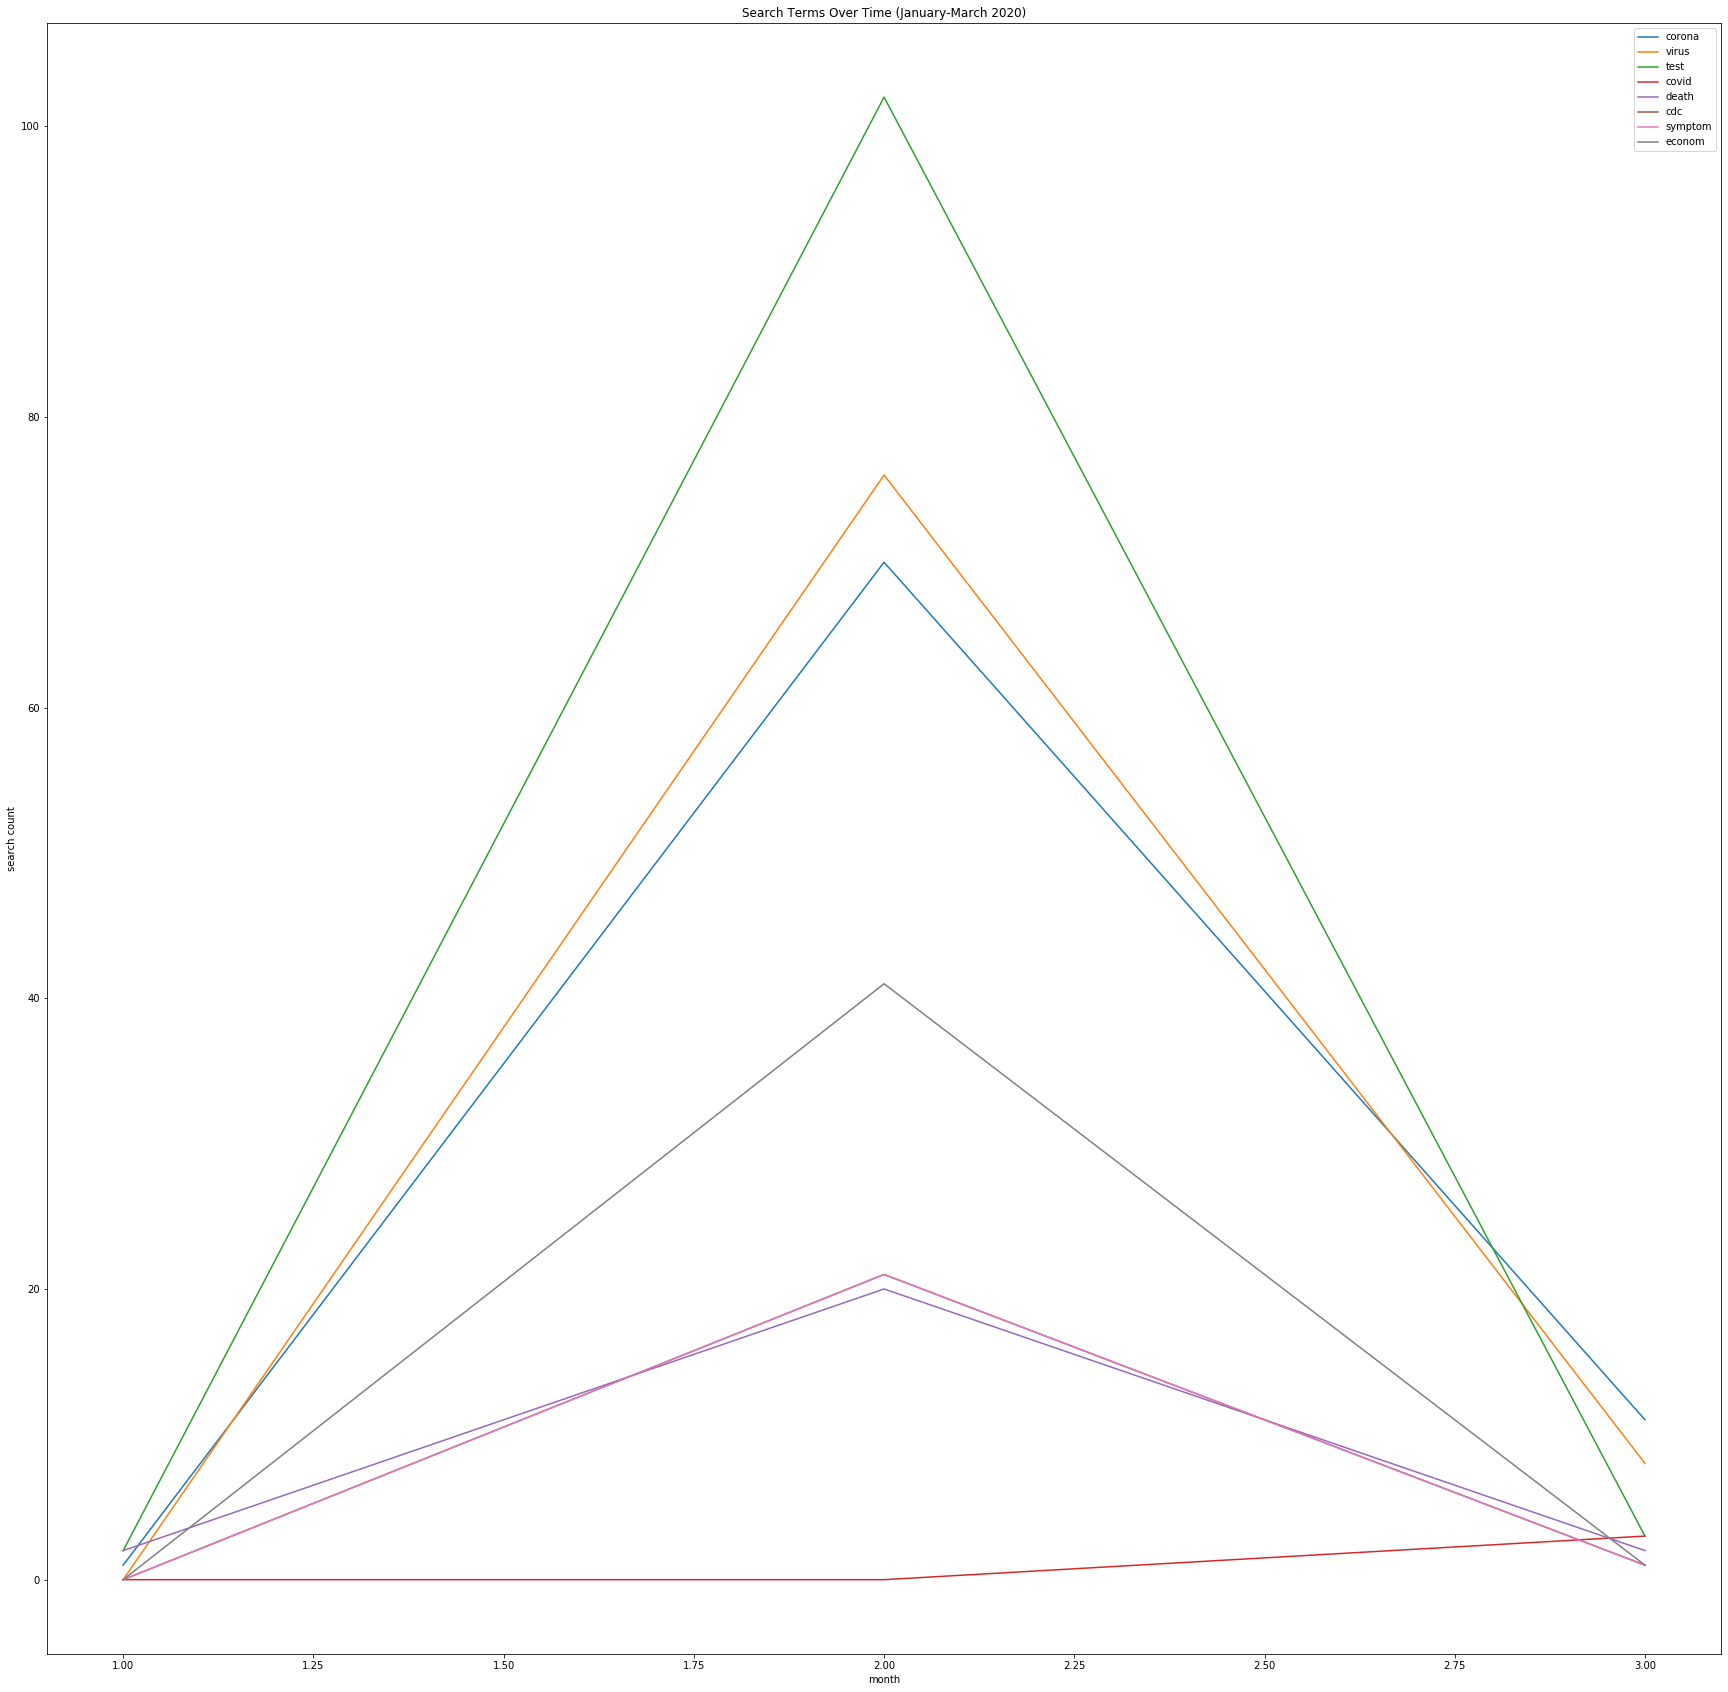

In [68]:
df_grouped = df_jan_march.groupby(['months', 'query']).count().reset_index()
qlist = df_grouped['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
cdc_search = [s for s in query_list if 'cdc' in s]
econom_search = [s for s in query_list if 'econom' in s]


key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search + econom_search 

df_grouped = df_grouped[df_grouped['query'].isin(key_search)] 

corona_plot = df_grouped['query'].str.contains('corona').groupby(df_grouped['months']).sum().plot(label='corona')
virus_plot = df_grouped['query'].str.contains('virus').groupby(df_grouped['months']).sum().plot(label='virus')
test_plot = df_grouped['query'].str.contains('test').groupby(df_grouped['months']).sum().plot(label='test')
covid_plot = df_grouped['query'].str.contains('covid').groupby(df_grouped['months']).sum().plot(label='covid')
death_plot = df_grouped['query'].str.contains('death').groupby(df_grouped['months']).sum().plot(label='death')
cdc_plot = df_grouped['query'].str.contains('cdc').groupby(df_grouped['months']).sum().plot(label='cdc')
symptom_plot = df_grouped['query'].str.contains('symptom').groupby(df_grouped['months']).sum().plot(label='symptom')
econom_plot = df_grouped['query'].str.contains('econom').groupby(df_grouped['months']).sum().plot(label='econom')


plt.xlabel('month')
plt.ylabel('search count')
plt.legend()
plt.title("Search Terms Over Time (January-March 2020)")


Text(0.5, 1.0, "'CDC' Over Time (January-March 2020)")

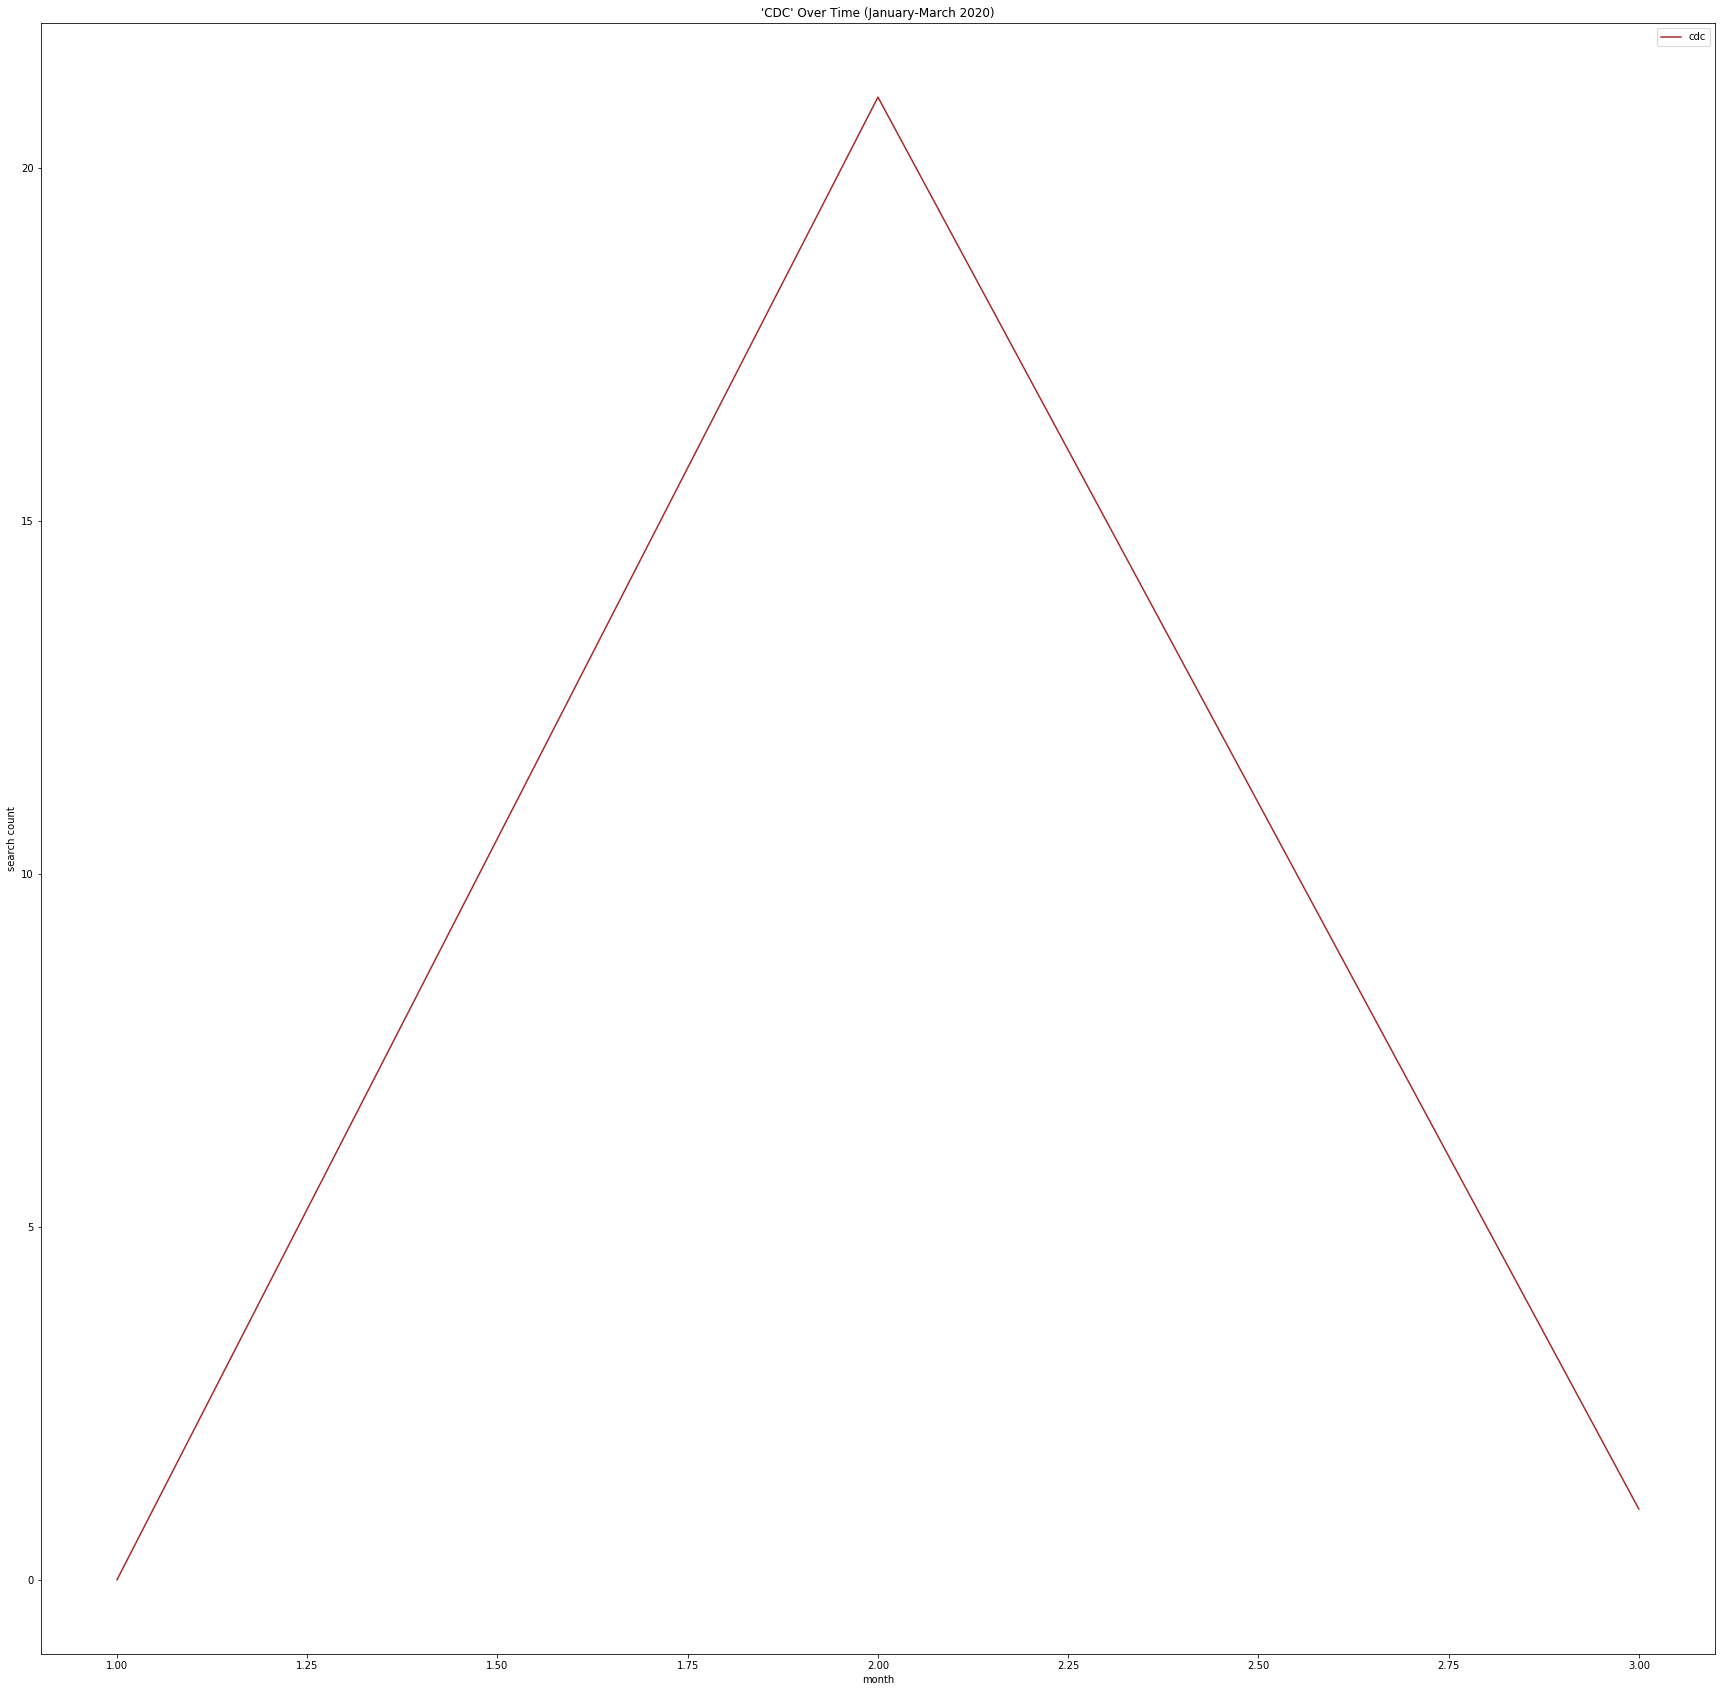

In [67]:
cdc_plot = df_grouped['query'].str.contains('cdc').groupby(df_grouped['months']).sum().plot(label='cdc', color='brown')
plt.xlabel('month')
plt.ylabel('search count')
plt.legend()
plt.title("'CDC' Over Time (January-March 2020)")




Text(0.5, 1.0, 'Search Terms over Weekdays')

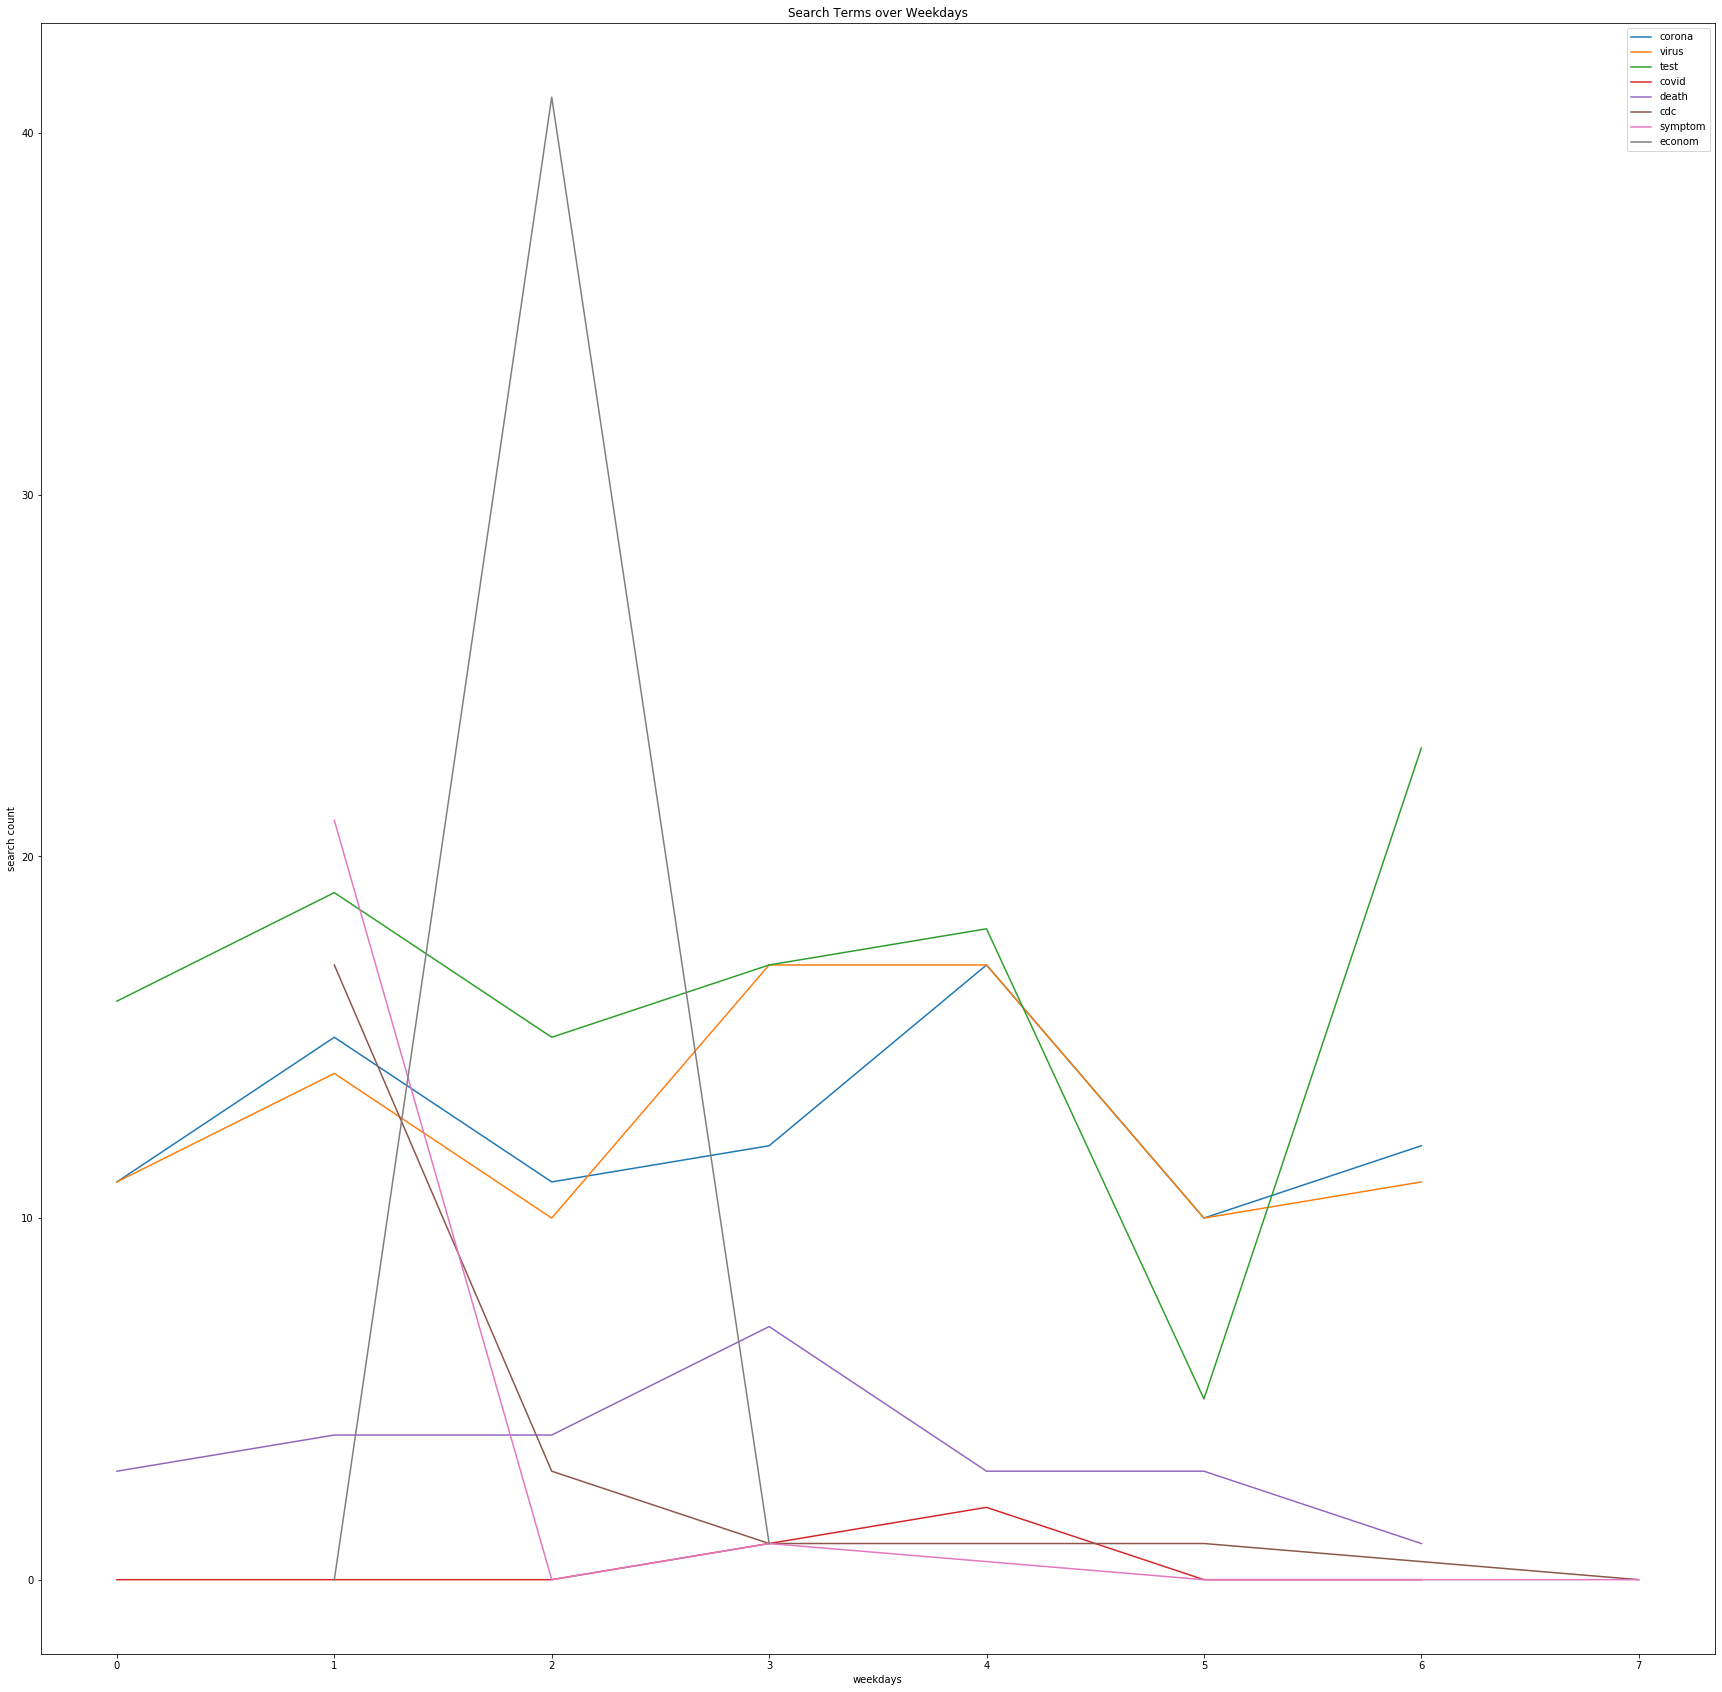

In [69]:
df_grouped_weekday = df_jan_march.groupby(['weekdays', 'query']).count().reset_index()
qlist = df_grouped_weekday['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
cdc_search = [s for s in query_list if 'cdc' in s]
econom_search = [s for s in query_list if 'econom' in s]

key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search + econom_search

df_grouped_weekday = df_grouped_weekday[df_grouped_weekday['query'].isin(key_search)] 

corona_plot = df_grouped_weekday['query'].str.contains('corona').groupby(df_grouped_weekday['weekdays']).sum().plot(label='corona')
virus_plot = df_grouped_weekday['query'].str.contains('virus').groupby(df_grouped_weekday['weekdays']).sum().plot(label='virus')
test_plot = df_grouped_weekday['query'].str.contains('test').groupby(df_grouped_weekday['weekdays']).sum().plot(label='test')
covid_plot = df_grouped_weekday['query'].str.contains('covid').groupby(df_grouped_weekday['weekdays']).sum().plot(label='covid')
death_plot = df_grouped_weekday['query'].str.contains('death').groupby(df_grouped_weekday['weekdays']).sum().plot(label='death')
cdc_plot = df_grouped['query'].str.contains('cdc').groupby(df_grouped['weekdays']).sum().plot(label='cdc')
symptom_plot = df_grouped['query'].str.contains('symptom').groupby(df_grouped['weekdays']).sum().plot(label='symptom')
econom_plot = df_grouped['query'].str.contains('econom').groupby(df_grouped['months']).sum().plot(label='econom')
plt.xlabel('weekdays')
plt.ylabel('search count')
plt.legend()
plt.title("Search Terms over Weekdays")


Text(0.5, 1.0, 'Search Terms Over Hours')

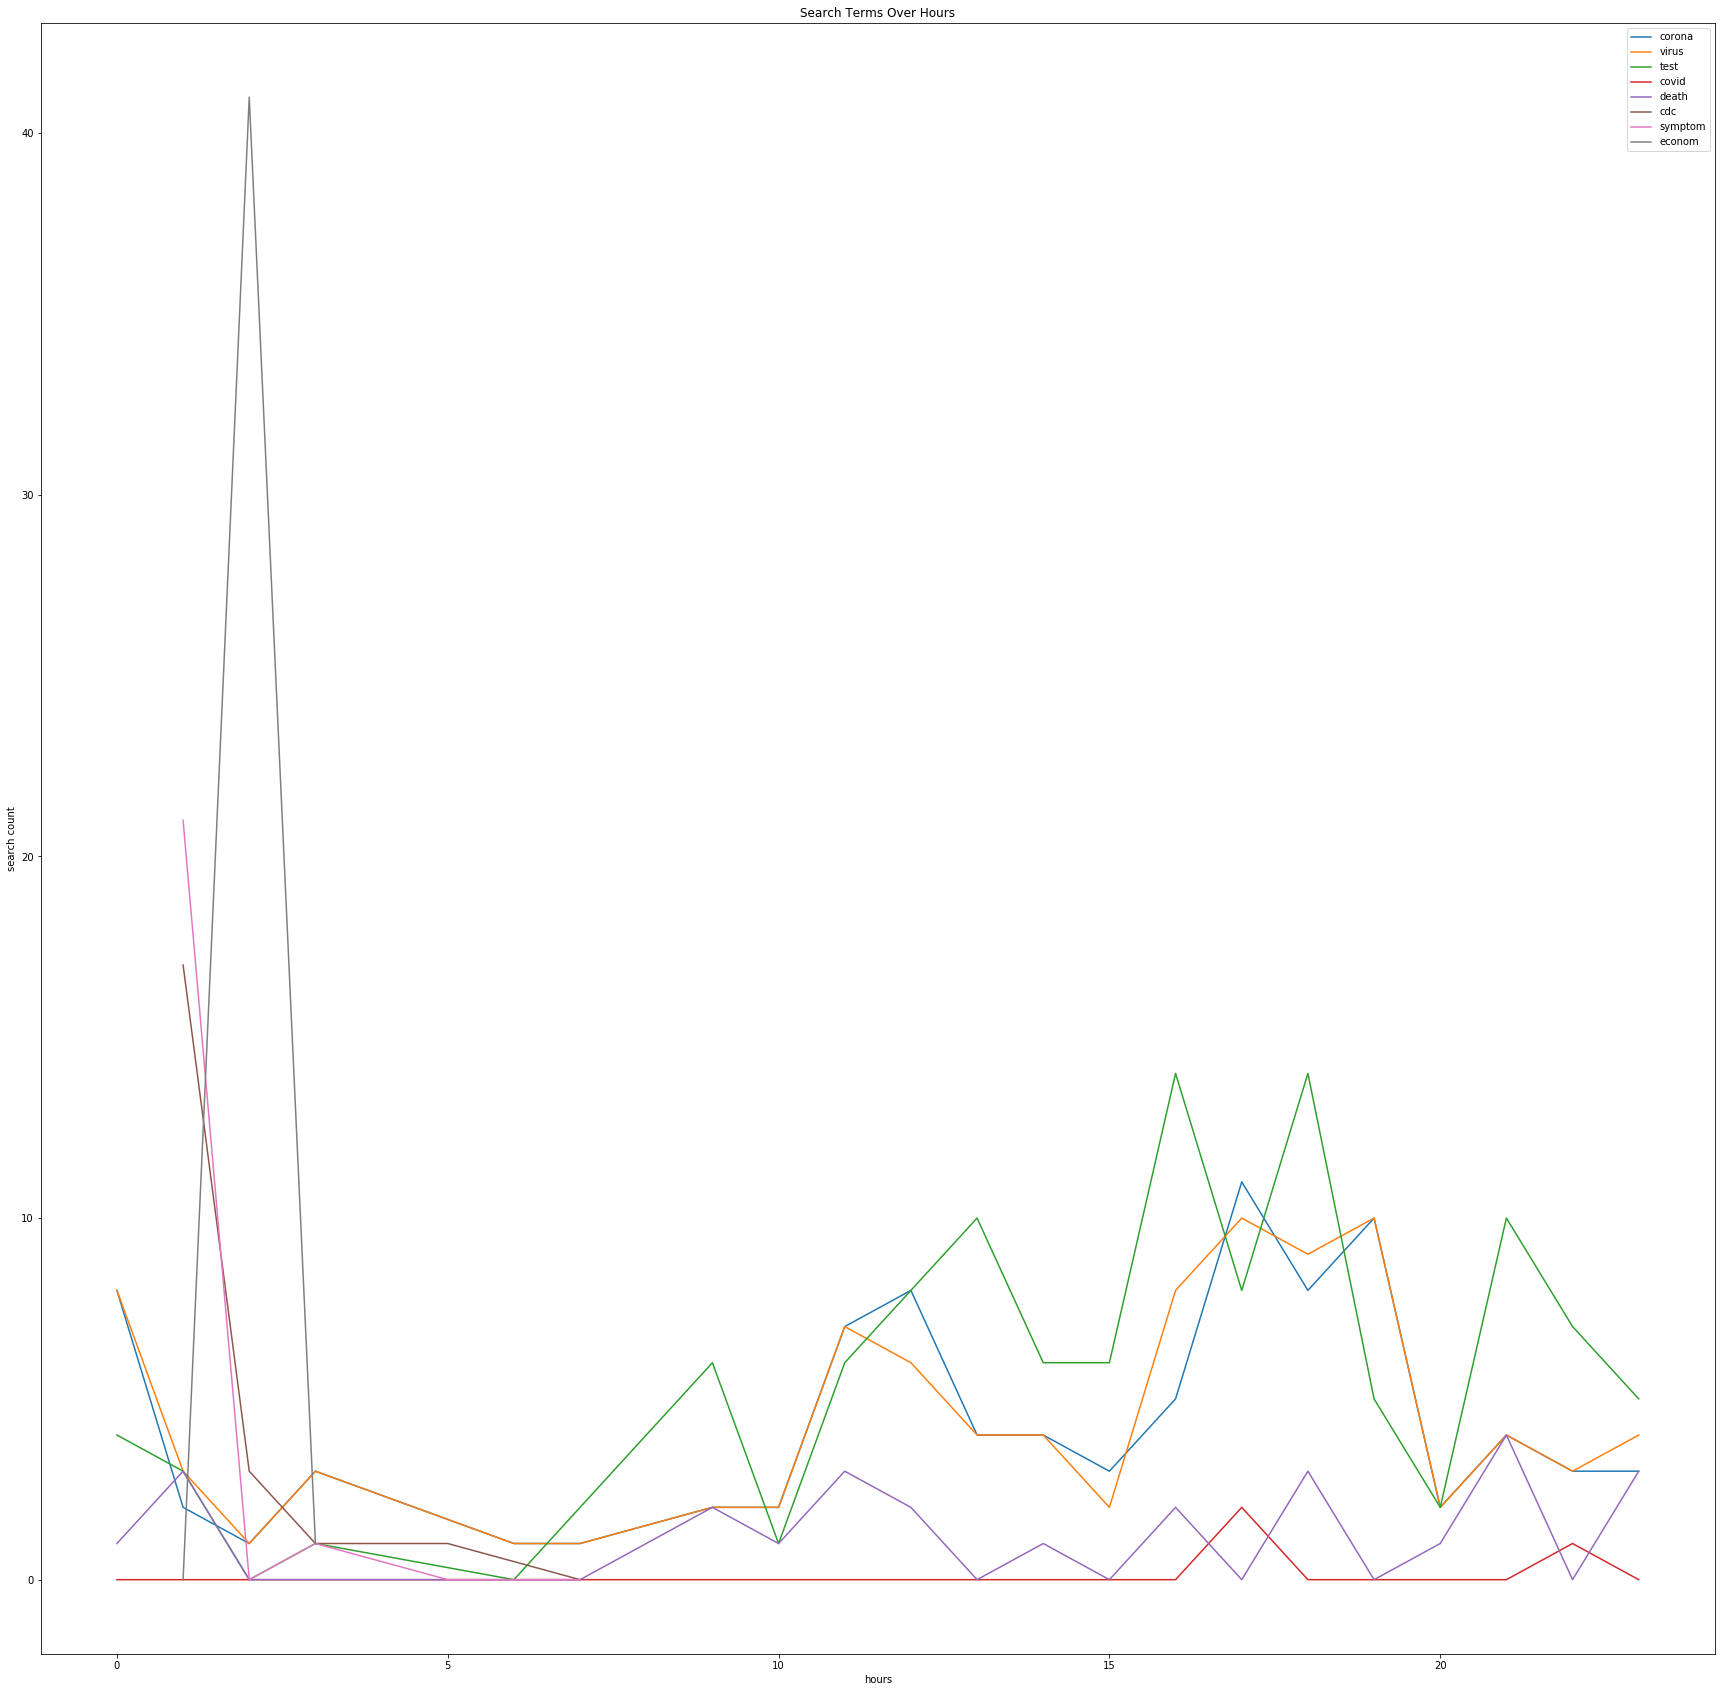

In [70]:
df_grouped_hour = df_jan_march.groupby(['hours', 'query']).count().reset_index()
qlist = df_grouped_hour['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

covid_search = [s for s in query_list if 'covid' in s]
virus_search = [s for s in query_list if 'virus' in s]
test_search = [s for s in query_list if 'test' in s]
death_search = [s for s in query_list if 'death' in s]
symptom_search = [s for s in query_list if 'symptom' in s]
corona_search = [s for s in query_list if 'corona' in s]
cdc_search = [s for s in query_list if 'cdc' in s]
econom_search = [s for s in query_list if 'econom' in s]


key_search = covid_search + virus_search + test_search + death_search + symptom_search + corona_search + cdc_search + econom_search

df_grouped_hour = df_grouped_hour[df_grouped_hour['query'].isin(key_search)] 

corona_plot = df_grouped_hour['query'].str.contains('corona').groupby(df_grouped_hour['hours']).sum().plot(label='corona')
virus_plot = df_grouped_hour['query'].str.contains('virus').groupby(df_grouped_hour['hours']).sum().plot(label='virus')
test_plot = df_grouped_hour['query'].str.contains('test').groupby(df_grouped_hour['hours']).sum().plot(label='test')
covid_plot = df_grouped_hour['query'].str.contains('covid').groupby(df_grouped_hour['hours']).sum().plot(label='covid')
death_plot = df_grouped_hour['query'].str.contains('death').groupby(df_grouped_hour['hours']).sum().plot(label='death')
cdc_plot = df_grouped['query'].str.contains('cdc').groupby(df_grouped['hours']).sum().plot(label='cdc')
symptom_plot = df_grouped['query'].str.contains('symptom').groupby(df_grouped['hours']).sum().plot(label='symptom')
econom_plot = df_grouped['query'].str.contains('econom').groupby(df_grouped['months']).sum().plot(label='econom')

plt.xlabel('hours')
plt.ylabel('search count')
plt.legend()
plt.title("Search Terms Over Hours")

Text(0.5, 1.0, 'Search Terms (Places) Over Time (January-March 2020)')

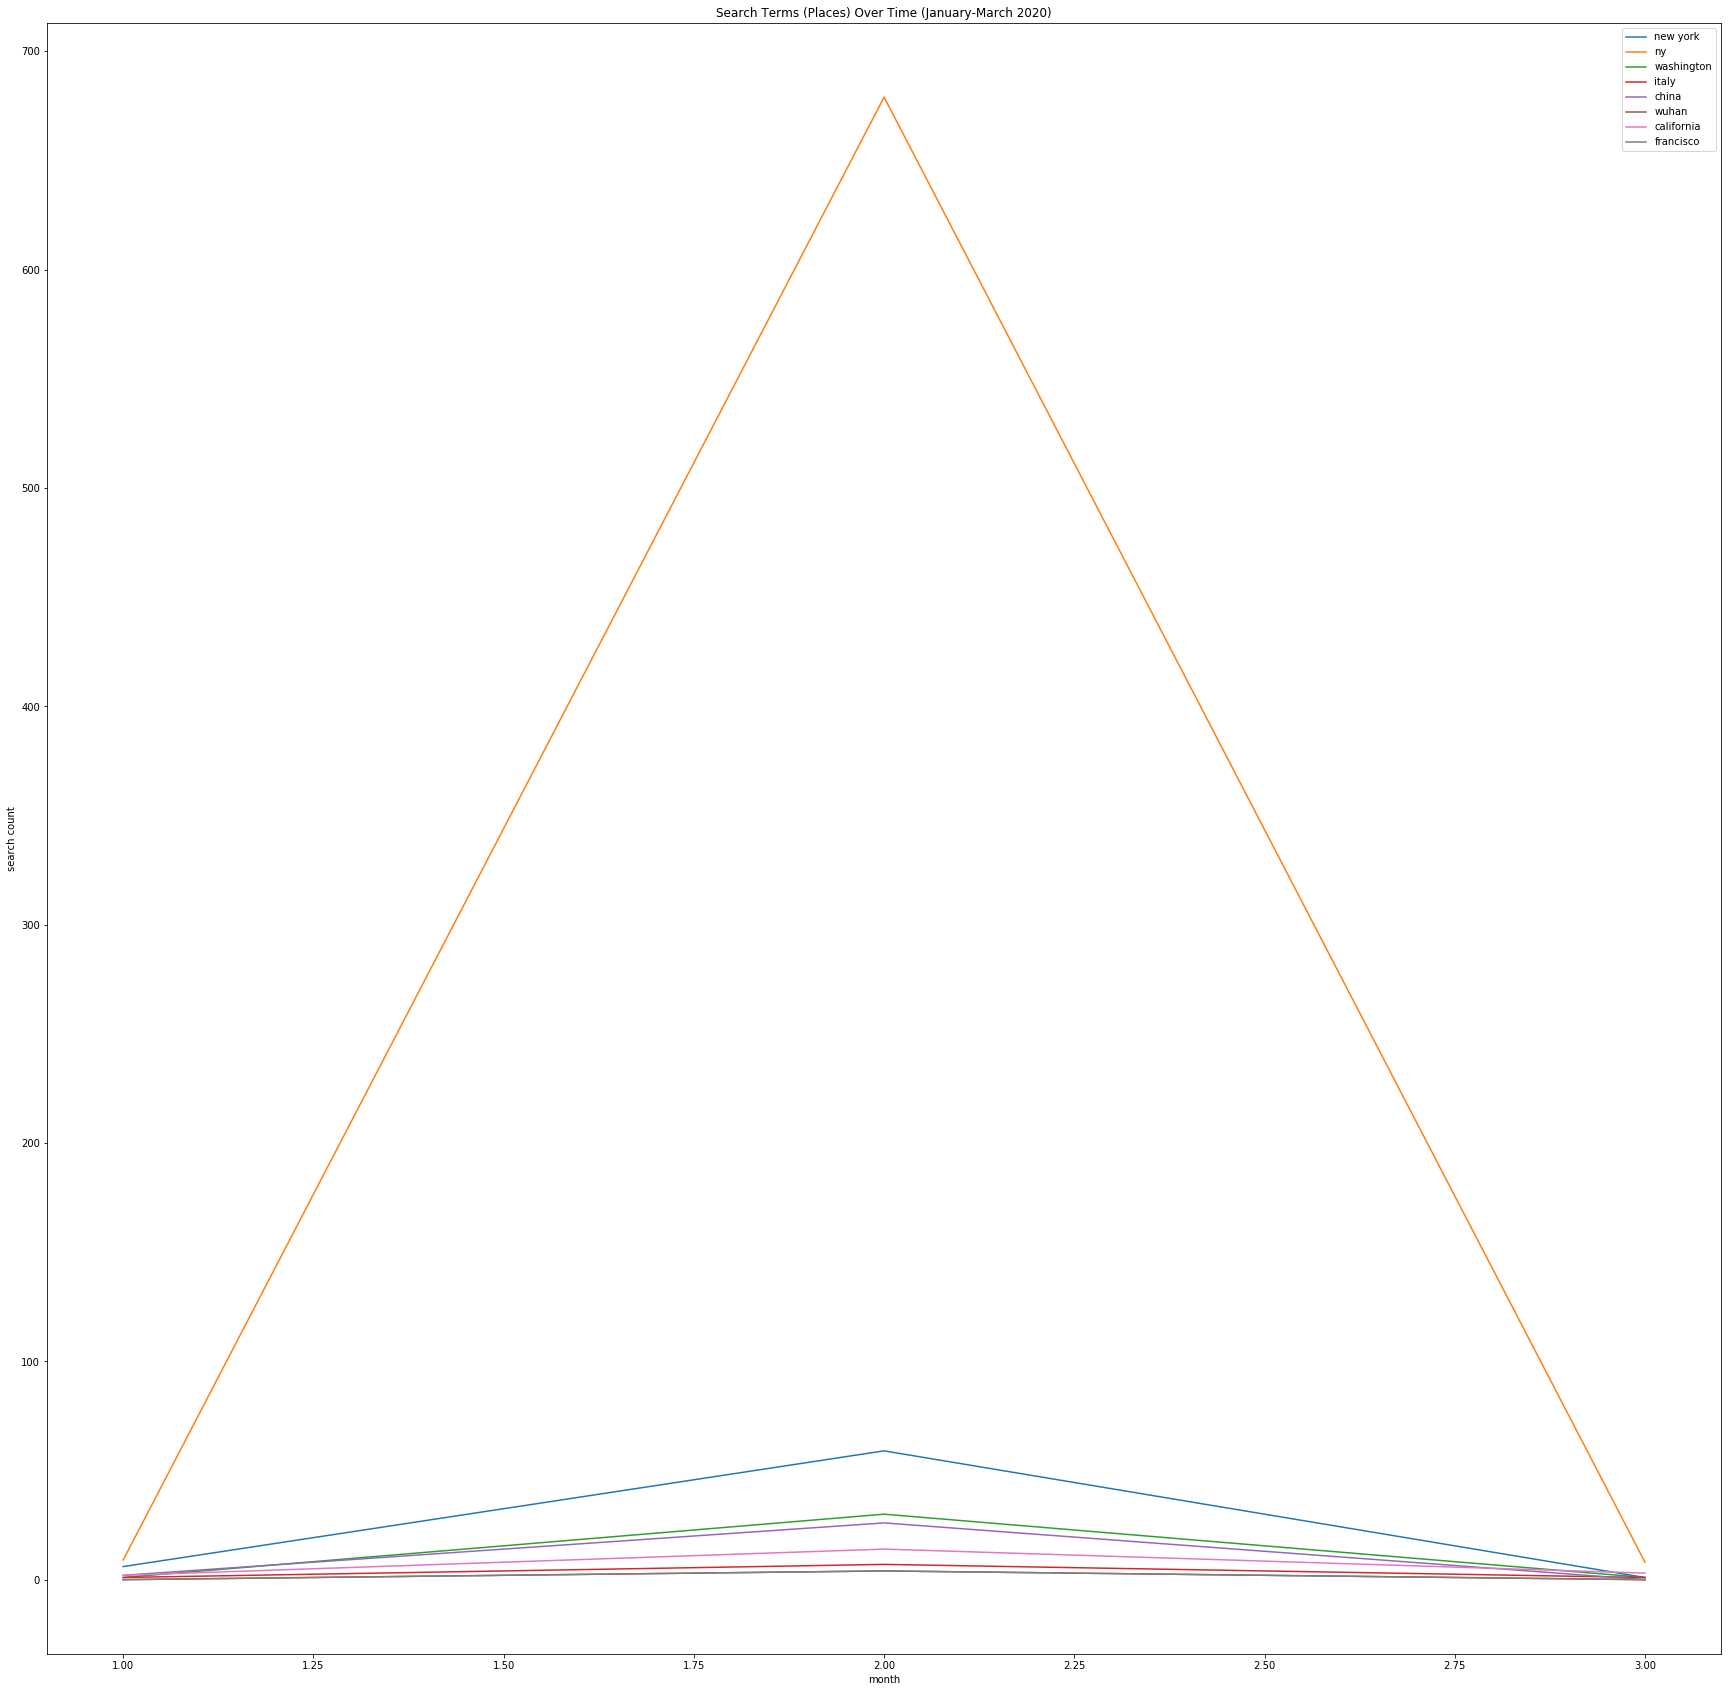

In [85]:
df_grouped = df_jan_march.groupby(['months', 'query']).count().reset_index()
qlist = df_grouped['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

new_york_search = [s for s in query_list if 'new york' in s]
ny_search = [s for s in query_list if 'ny' in s]
washington_search = [s for s in query_list if 'washington' in s]
italy_search = [s for s in query_list if 'italy' in s]
china_search = [s for s in query_list if 'china' in s]
wuhan_search = [s for s in query_list if 'wuhan' in s]
california_search = [s for s in query_list if 'california' in s]
francisco_search = [s for s in query_list if 'francisco' in s]


key_search = new_york_search + ny_search + death_search + washington_search + italy_search + china_search + wuhan_search + california_search + francisco_search 

df_grouped = df_grouped[df_grouped['query'].isin(key_search)] 

new_york_plot = df_grouped['query'].str.contains('new york').groupby(df_grouped['months']).sum().plot(label='new york')
ny_plot = df_grouped['query'].str.contains('ny').groupby(df_grouped['months']).sum().plot(label='ny')
washington_plot = df_grouped['query'].str.contains('washington').groupby(df_grouped['months']).sum().plot(label='washington')
italy_plot = df_grouped['query'].str.contains('italy').groupby(df_grouped['months']).sum().plot(label='italy')
china_plot = df_grouped['query'].str.contains('china').groupby(df_grouped['months']).sum().plot(label='china')
wuhan_plot = df_grouped['query'].str.contains('wuhan').groupby(df_grouped['months']).sum().plot(label='wuhan')
california_plot = df_grouped['query'].str.contains('california').groupby(df_grouped['months']).sum().plot(label='california')
francisco_plot = df_grouped['query'].str.contains('francisco').groupby(df_grouped['months']).sum().plot(label='francisco')


plt.xlabel('month')
plt.ylabel('search count')
plt.legend()
plt.title("Search Terms (Places) Over Time (January-March 2020)")


Text(0.5, 1.0, 'Search Terms (People) Over Time (January-March 2020)')

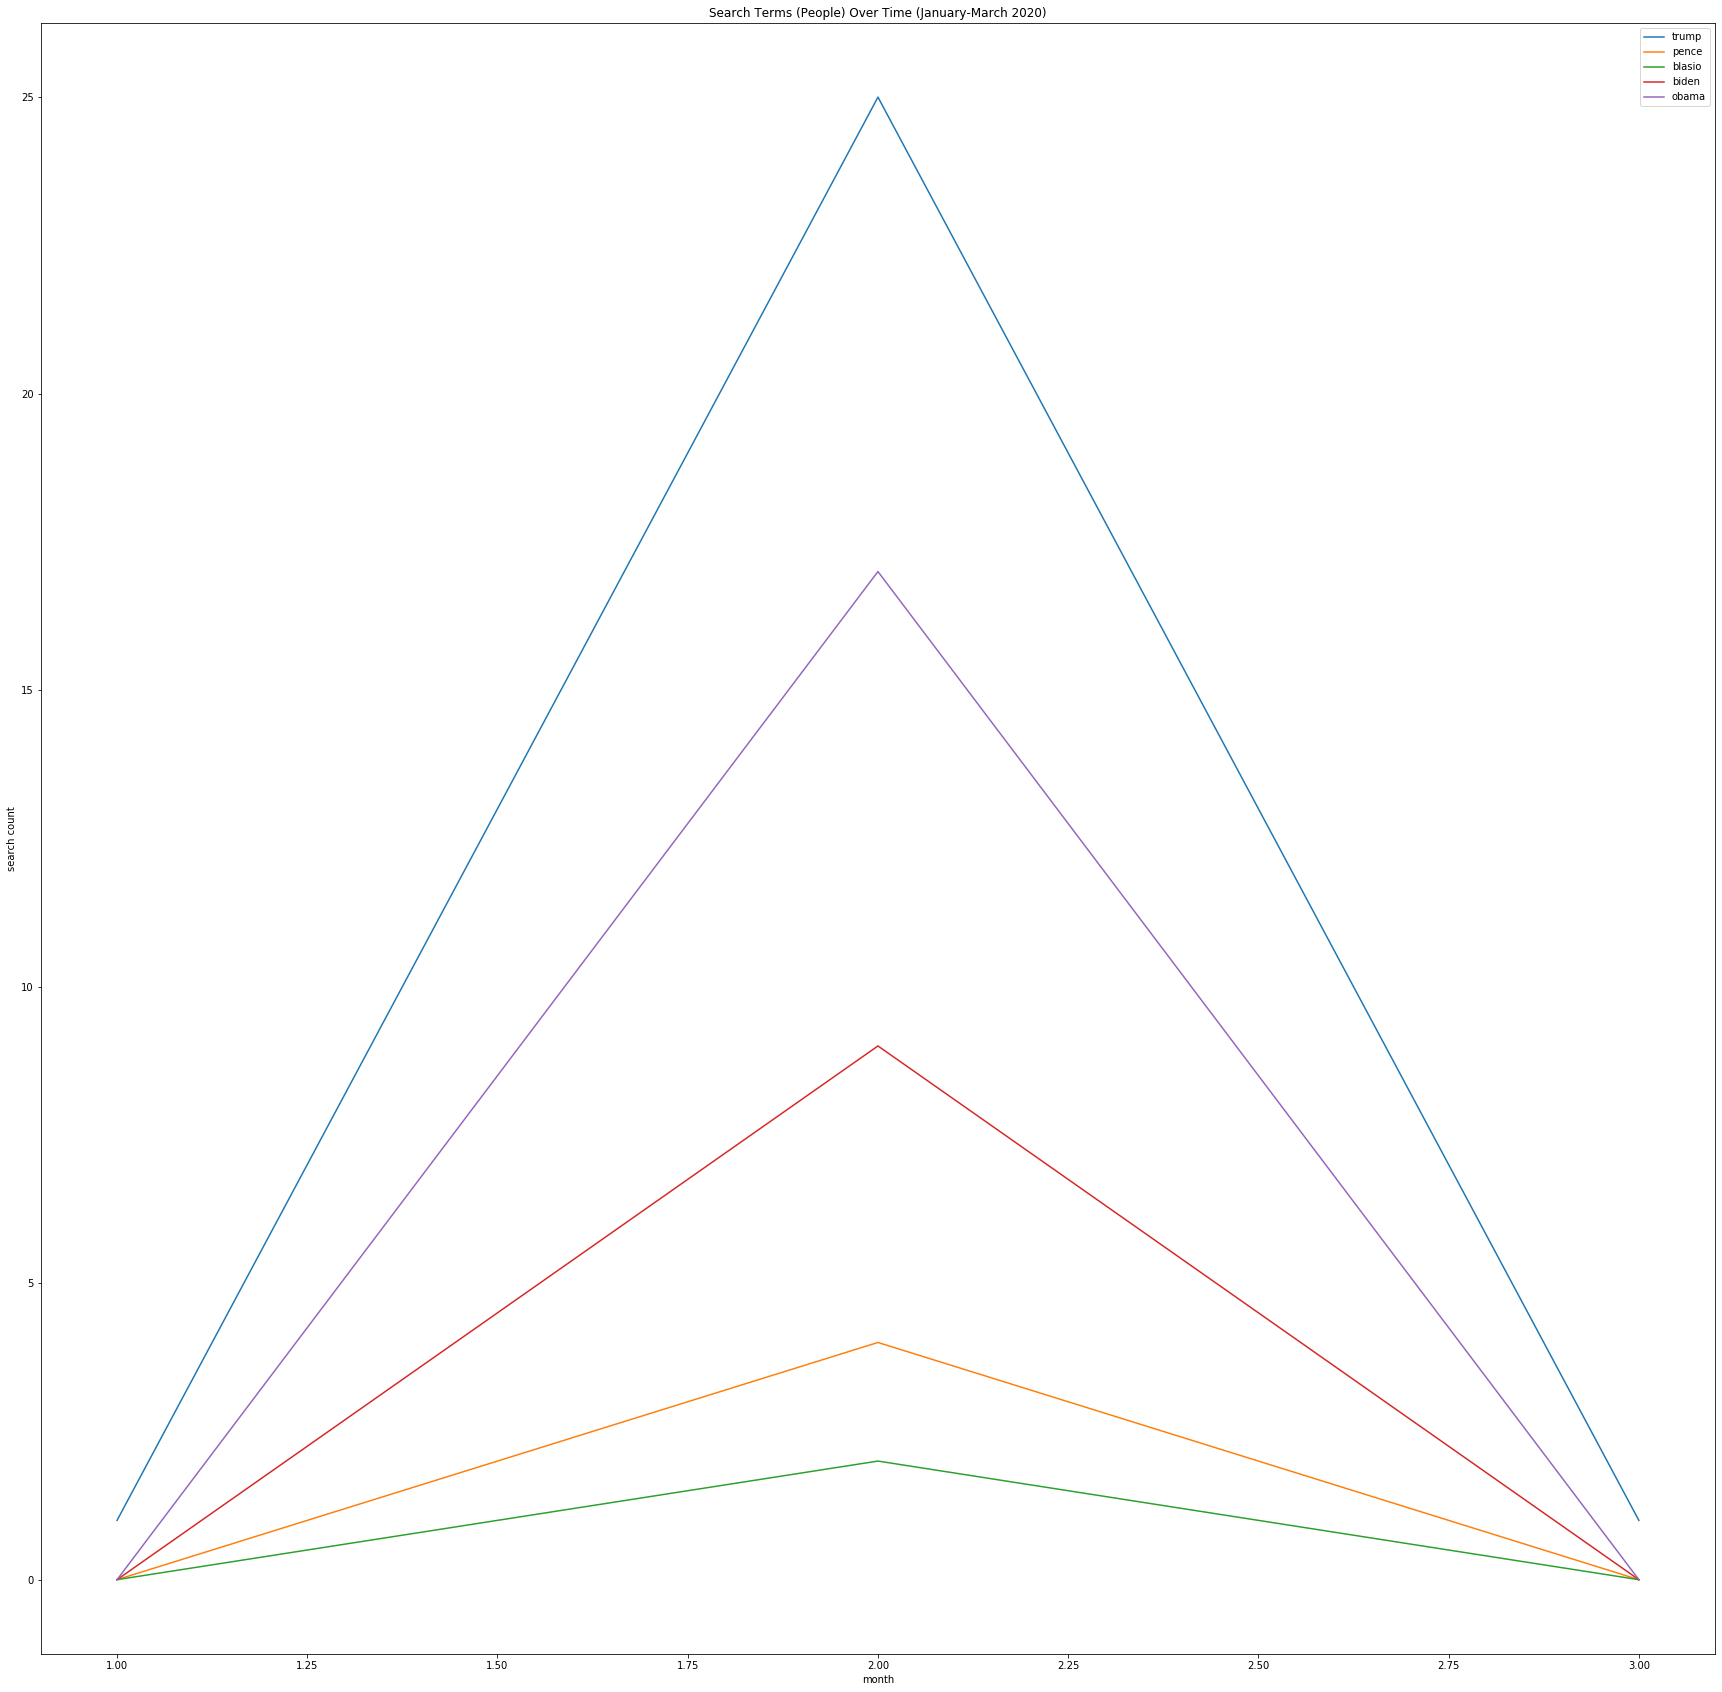

In [84]:
df_grouped = df_jan_march.groupby(['months', 'query']).count().reset_index()
qlist = df_grouped['query'].values.tolist()

query_list = []
for e in qlist:
    query_list.append(e.lower())

trump_search = [s for s in query_list if 'trump' in s]
cuomo_search = [s for s in query_list if 'cuomo' in s]
pence_search = [s for s in query_list if 'pence' in s]
blasio_search = [s for s in query_list if 'blasio' in s]
biden_search = [s for s in query_list if 'biden' in s]
obama_search = [s for s in query_list if 'obama' in s]

key_search = trump_search + cuomo_search + pence_search + blasio_search + biden_search + obama_search

df_grouped = df_grouped[df_grouped['query'].isin(key_search)] 

trump_plot = df_grouped['query'].str.contains('trump').groupby(df_grouped['months']).sum().plot(label='trump')
# cuomo_plot = df_grouped['query'].str.contains('cuomo').groupby(df_grouped['months']).sum().plot(label='cuomo')
pence_plot = df_grouped['query'].str.contains('pence').groupby(df_grouped['months']).sum().plot(label='pence')
blasio_plot = df_grouped['query'].str.contains('blasio').groupby(df_grouped['months']).sum().plot(label='blasio')
biden_plot = df_grouped['query'].str.contains('biden').groupby(df_grouped['months']).sum().plot(label='biden')
obama_plot = df_grouped['query'].str.contains('obama').groupby(df_grouped['months']).sum().plot(label='obama')

plt.xlabel('month')
plt.ylabel('search count')
plt.legend()
plt.title("Search Terms (People) Over Time (January-March 2020)")
